# Introduction into Symetric Criptography

## 1. Introduction

In this first lab of the subject of system administration and security, we will focus on how does it work symetric criptography. But before that, it is necessary to put you in context about what it is cryptography.

Cryptography is a very useful tool when computer security is desired; it can also be understood as a means to guarantee the confidentiality, integrity and availability properties of a system's resources. The word cryptography comes in an etymological sense from the Greek Kriptos=to hide, Graphos=writing, which would mean to hide writing, or in a broader sense to apply some technique to make a message unintelligible. Apart from that, we need to differenciate between two types of cryptographies in the history: classical and modern. 

Classical cryptography is based on simple encryption methods, such as substitution and transposition, which were effective at the time but lack the necessary robustness to today's analysis methods. These methods include algorythms where the key used is the same for encryption and decryption. An important example of classical cryptography is the Enigma machine, used during World War II, which, although advanced at the time, was based on classical cryptographic principles that were later decrypted.

In contrast, modern cryptography relies on advanced mathematical algorythms and computational power to protect information. Modern methods include algorythms which are much more secure due to the mathematical complexity behind them.  Security in modern cryptography is based on complex mathematical problems, such as factoring large numbers or the discrete logarithm, which are practically impossible to solve without the right key, at least with today's conventional computers.

Knowing that about the types of cryptographies, in modern criptography we need to differ between symmetric and asymmetric criptography. 

In symmetric criptography, you only need a private key. That key will be responsible to encrypt and decrypt the data that is sent between the different actors, basically as classical cryptography. 

<img src="images/symmetricCriptography.png" width="400" height="200" alt="Asymmetric Cryptography">

Whereas in asymmetric cryptography, it is added a new key, a public key. Having both keys, the responsibilites that had the private key from the symmetric criptography are divided. Now, the public key is responsible for encrypting the data and the other one, the private key, to decrypt it.

<img src="images/asymmetricCriptography.png" width="400" height="200" alt="Asymmetric Cryptography">

Symmetric encryption consists of using a single key to both encrypt (encode) and decrypt (decode) data. This key can be either a word, a number or a string of letters. This key is applied directly to a message. The message is modified according to the rules of the key.  The sender and receiver of the message are the people who know the key, and thus can encode and decode the message whenever they want.
One of the advantages is that it is fast and efficient for large volumes of data. However, the key must be kept secret and securely shared between parties.

# 2. Objective of the lab 

The objective of lab is to understand the fundamentals of symmetric cryptography by implementing a system for encrypting and decrypting messages. In order to be done, we will use the encryption of Caesar Cipher in Python.


The Caesar cipher is a substitution cipher technique in which each letter in a message is replaced by a letter that is a fixed number of positions further down the alphabet. This number of positions is called an ‘offset’. It is an example of symmetric cryptography, where the same key (in this case, the shift number) is used for both encryption and decryption.

 
In order to be done, the lab will be spread in three parts: 

- The first part, it will be the development of the encryption and decryption algorythms. 
- The second part, it will be the development of a brute force decryption algorythm. 
- The last part, it will be the development of the analysis of the encryption algorythm.

In this practice, you will be exploring the whole process of protecting information. In addition, the student is expected to analyse the importance of maintaining the secret key and experiment with the risks associated with using incorrect keys for decryption.

# 3. Development of the lab 

### 3.1. Part I: Encryption and decryption algorythm

First of all, you will need to decide which alphabet you want to use. In our case, we will use the latin alphabet.

In [1]:
alphabet_mayus = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
alphabet_minus = "abcdefghijklmnopqrstuvwxyz"

Afterwards, you will need to develop the function to encrypt the message. As it was explained previously, this encryption technique is based on substitution. In that case, it is necessary to pass as a parameter to the function the number of positions do we want to move each letter. This number will be the same for each letter.

In [ ]:
def encrypt_caesar(message, moves):
    encrypt_message = ""
    for character in message.upper():
        if character in alphabet_mayus:
            # Find the position of the character in the alphabet
            position = (alphabet_mayus.index(character) + moves) % len(alphabet_mayus)
            encrypt_message += alphabet_mayus[position]

        elif character in alphabet_minus:
            position = (alphabet_minus.index(character) + moves) % len(alphabet_minus)
            encrypt_message += alphabet_minus[position]

        else:
            encrypt_message += character  # Maintain the character if it is not in the alphabet
    return encrypt_message


def encrypt_rail_fence(message, rails):
    if rails < 2:
        return message  # No encryption for 1 rail
    
    # Create empty rails
    railArray = ['' for _ in range(rails)]
    row, step = 0, 1
    
    for char in message:
        railArray[row] += char
        
        # Change direction at top and bottom rails
        if row == 0:
            step = 1
        elif row == rails - 1:
            step = -1
        row += step
    
    # Concatenate all rows to get the cipher text
    return ''.join(railArray)

As you can see, the algorithm does a loop in order to pick individually each letter. After that, it tries to confirm if the letter pick is part of the alphabet. If it is not, the letter is not changed. Afterwards, it finds the new position of the letter, it picks the substitution letter and it concatenates it to the encrypt string. In the end, it returns the encrypted message.

In order to decrypt the message, it is necessary to do the reverse process. The basic thing in that operation is the number of moves because if it is not the same, it will be impossible to decrypt the message. This number is our key to do both operations.

In [ ]:
# Function to decrypt a message encrypted with the Caesar cipher
def decrypt_message(encrypted_message, moves):
    decrypt_message = ""
    for character in encrypted_message:
        if character in alphabet_mayus:
            # Encontrar la posición original restando el desplazamiento
            position = (alphabet_mayus.index(character) - moves) % len(alphabet_mayus)
            decrypt_message += alphabet_mayus[position]
        elif character in alphabet_minus:
            position = (alphabet_minus.index(character) - moves) % len(alphabet_minus)
            decrypt_message += alphabet_minus[position]
        else:
            decrypt_message += character  # Maintain the character if it is not in the alphabet
    return decrypt_message

def encrypt_rail_fence(encrypted_message, rails):
    if rails < 2:
        return encrypted_message  # No decryption needed for 1 rail
    
    # Determine the zigzag pattern
    railArray = [['' for _ in range(len(encrypted_message))] for _ in range(rails)]
    row, step = 0, 1
    
    # Mark positions where characters will be placed
    for col in range(len(encrypted_message)):
        railArray[row][col] = '*'
        if row == 0:
            step = 1
        elif row == rails - 1:
            step = -1
        row += step

    # Fill the marked positions with the actual characters
    index = 0
    for r in range(rails):
        for c in range(len(encrypted_message)):
            if railArray[r][c] == '*' and index < len(encrypted_message):
                railArray[r][c] = encrypted_message[index]
                index += 1

    # Read the characters in zigzag order
    row, step = 0, 1
    decrypt_message = []
    
    for col in range(len(encrypted_message)):
        decrypt_message.append(railArray[row][col])
        if row == 0:
            step = 1
        elif row == rails - 1:
            step = -1
        row += step
    
    return ''.join(decrypt_message)

In this function, instead of adding moves to change the character, it is necessary to do the opposite, deducting. In the end, we will obtain our decrypted message.

In order to test if it is everything alright, you will to enter a message through the console and call both function. On the first part, the console will ask you to enter the message and a number.

In [ ]:
# Ask the user for the message and the number of moves
message = input("Enter the message to be encrypted: ")
encrypted_message = ""
encryptionTechnique = input("Enter the encryption technique (Caesar (0) or Rail Fence(1)): ")
if encryptionTechnique == 0:
    moves = int(input("Enter the number of moves (key): "))
    encrypted_message = encrypt_caesar(message, moves)
else :
    rails = int(input("Enter the number of rails: "))
    encrypted_message = encrypt_rail_fence(message, rails)
    
# Encrypt the message
print("Encrypted message:", encrypted_message)


Encrypted message: RYVK


After, it will be needed to call the other function to decrypt the message.

In [ ]:
# Decrypt the message
decrypted_message = ""
if encryptionTechnique == 0:
    decrypted_message = decrypt_message(encrypted_message, moves)
else :
    decrypted_message = encrypt_rail_fence(encrypted_message, rails)
print("Encrypted message:", decrypted_message)

Encrypted message: HOLA


If you want to test what happens when you change the number of moves, you only need to enter a new different number into the console what it return to you.

In [ ]:
# Test the decryption with an incorrect number of moves
uncorrect_decrypted_message = ""
if encryptionTechnique == 0:
    uncorrect_moves = int(input("Enter the number of moves: "))
    uncorrect_decrypted_message = decrypt_message(encrypted_message, uncorrect_moves)
else :
    uncorrect_rails = int(input("Enter the number of rails: "))
    uncorrect_decrypted_message = encrypt_rail_fence(encrypted_message, uncorrect_rails)
print("Uncorrect decrypted message:", uncorrect_decrypted_message)


Uncorrect decrypted message: NURG


### 3.2. Part II: Brute-force attack

In the second part of the practice, as it was said previously, you will need to develop a brute-force attack in order to decrypt a message that is on a file in the folder of the lab.

Firstly, you will need to ensure that you got the following library installed in your working environment and then, download the corpus of words in english.

In [1]:
%pip install nltk
import nltk
nltk.download('words')

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\MM\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

First of all, you will need to open the file *encrypted_text.txt* and read it.

In [8]:
# Read the file text
with open("encrypted_text.txt", "r") as file:
    encrypted_message = file.read().strip()

print("Encrypted message from the file read:", encrypted_message)

Encrypted message from the file read: p spcl pu h ovbzl ulhy aol tvbuahpuz. p ohcl adv iyvaolyz huk vul zpzaly, huk p dhz ivyu shza. tf mhaoly alhjolz thaolthapjz, huk tf tvaoly pz h ubyzl ha h ipn ovzwpahs. tf iyvaolyz hyl clyf zthya huk dvyr ohyk pu zjovvs. tf zpzaly pz h ulycvbz npys, iba zol pz clyf rpuk. tf nyhuktvaoly hszv spclz dpao bz. zol jhtl myvt pahsf dolu p dhz adv flhyz vsk. zol ohz nyvdu vsk, iba zol pz zapss clyf zayvun. zol jvvrz aol ilza mvvk!

tf mhtpsf pz clyf ptwvyahua av tl. dl kv svaz vm aopunz avnlaoly. tf iyvaolyz huk p sprl av nv vu svun dhsrz pu aol tvbuahpuz. tf zpzaly sprlz av jvvr dpao tf nyhuktvaoly. vu aol dllrlukz dl hss wshf ivhyk nhtlz avnlaoly. dl shbno huk hsdhfz ohcl h nvvk aptl. p svcl tf mhtpsf clyf tbjo.


Afterwards, you will need to import the library nltk in your python project in order to load the list of words in english.

In [ ]:
from nltk.corpus import words

# List of English words
english_words = set(words.words())

In order to do properly this part, you may create a function in order to verify the number of valid words that has the text with the list of words in english.

In [10]:
# Function to verify the number of valid words in the message
def count_words_valid(text):
    words = text.split()
    valid_word_count = 0
    for word in words:
        if word.lower() in english_words:
            valid_word_count += 1
    
    return valid_word_count

Hereafter, you will need to create a loop to check which is the correct number of moves that is necessary to decrypt the encrypted message. Once created the loop and it has been sent the first possibility, the message will be sent to the function that checks if the message is correct. Depending the number of valid words, it will be an update of the best movement.

In [11]:
# Variables to store the best decryption
best_movement = None
max_valid_words = 0

# Bruteforce attack to decrypt without knowing the key
print("\nTesting all the possible keys to do a brute-force attack:")
for move in range(1, len(alphabet_mayus)):
    test_message = decrypt_message(encrypted_message, move)
    valid_words = count_words_valid(test_message)

    print(f"Movement {move}: {test_message} (Number of word valids: {valid_words})")

    if valid_words > max_valid_words:
        max_valid_words = valid_words
        best_movement = move


Testing all the possible keys to do a brute-force attack:
Movement 1: o robk ot g nuayk tkgx znk suatzgoty. o ngbk zcu hxuznkxy gtj utk yoyzkx, gtj o cgy huxt rgyz. se lgznkx zkginky sgznksgzoiy, gtj se suznkx oy g taxyk gz g hom nuyvozgr. se hxuznkxy gxk bkxe ysgxz gtj cuxq ngxj ot yinuur. se yoyzkx oy g tkxbuay moxr, haz ynk oy bkxe qotj. se mxgtjsuznkx gryu robky cozn ay. ynk igsk lxus ozgre cnkt o cgy zcu ekgxy urj. ynk ngy mxuct urj, haz ynk oy yzorr bkxe yzxutm. ynk iuuqy znk hkyz luuj!

se lgsore oy bkxe osvuxzgtz zu sk. ck ju ruzy ul znotmy zumkznkx. se hxuznkxy gtj o roqk zu mu ut rutm cgrqy ot znk suatzgoty. se yoyzkx roqky zu iuuq cozn se mxgtjsuznkx. ut znk ckkqktjy ck grr vrge hugxj mgsky zumkznkx. ck rgamn gtj grcgey ngbk g muuj zosk. o rubk se lgsore bkxe sain. (Number of word valids: 25)
Movement 2: n qnaj ns f mtzxj sjfw ymj rtzsyfnsx. n mfaj ybt gwtymjwx fsi tsj xnxyjw, fsi n bfx gtws qfxy. rd kfymjw yjfhmjx rfymjrfynhx, fsi rd rtymjw nx f szwxj fy f gnl mtxunyfq. rd

Finally, after checking all the possibilities as we will not discard any possibility because there are not too many, it will be shown the best decryption if it was found. If it is not (which will not be the case), it will be shown a message that the message was not found.

In [12]:
# Show the best decryption
if best_movement:
    decrypted_message = decrypt_message(encrypted_message, best_movement)
    print(f"\nBest movement: {best_movement}")
    print("Decrypted message:", decrypted_message)
else:
    print("It was not found a fine movement.")


Best movement: 7
Decrypted message: i live in a house near the mountains. i have two brothers and one sister, and i was born last. my father teaches mathematics, and my mother is a nurse at a big hospital. my brothers are very smart and work hard in school. my sister is a nervous girl, but she is very kind. my grandmother also lives with us. she came from italy when i was two years old. she has grown old, but she is still very strong. she cooks the best food!

my family is very important to me. we do lots of things together. my brothers and i like to go on long walks in the mountains. my sister likes to cook with my grandmother. on the weekends we all play board games together. we laugh and always have a good time. i love my family very much.


It is necessary to say that in our case that all the possibilities will be shown because there are few ones. In the case there were a lot, it will be necessary to develop a better function in order to detect the number of valid words. 

### 3.3. Part III: Cryptanalysis

In the last part of this lab, we will develop a cryptanalysis program. The main objective of this technique is to develop attacking methods to achieve, with a reasonable hope of success, obtain the used key. One first try of cryptanalysis is what we made before, a bruteforce attack. However, brute force isn't considered a **"real"** cryptanalysis technique because modern encryption systems are designed to have so many possible keys that trying them all would take an impossibly long time, even with powerful computers.

For example, if there are billions of billions of keys, checking every one could take thousands of years, which makes brute force impractical. Instead, cryptanalysis usually involves finding smarter ways to break the encryption without testing every single key

Taking that into consideration, it will be necessary to implement a real cryptanalysis technique will be frequency analysis. This technique consist of studying the relative frequency of appearance of the different letters if the ciphertext, to compare them with a statistical description that we have obtained of the language in which we suspect or know that the original message is to be found. A study can also be carried out on the most used words, or on the digraphs and trigrams that constitute the most frequent beginning and ending of the words of a language. 

First of all, we will to read a file in spanish. In our case, we will ask the program to read the file *"quijote.txt"*. After asking it to read, we will create a function to calculate the frequencies for each letter to appear. Nevertheless, it is vital to import two libraries in our project.

In [1]:
from collections import Counter
import string

The element *Counter* from the module *collections* will make us able to count element in collections, as lists, string or any iterable. 
Then, *string* contains constants and functions related to text strings. Really useful when you need to work with alphabetic characters, digits, etc.

In [14]:
def calculate_frequencies(text):
    text = text.lower()

    # Remove all characters that are not letters
    letters_only = ""
    for char in text:
        if char in alphabet_minus or char in alphabet_mayus:
            letters_only += char

    total_letters = len(letters_only)
    count = Counter(letters_only)
    frequencies = {}

    # Calculate the frequency of each letter in the text
    for letter in string.ascii_lowercase:
        if total_letters > 0:
            frequencies[letter] = (count[letter] / total_letters) * 100
        else:
            frequencies[letter] = 0
    return frequencies

In the previous function, we have filtered and analyzed only the letter from the alphabet. Afterwards, we have calculated the percentage of appearance of each one.

In [15]:
# Read both files texts
with open("quijote.txt", "r", encoding="utf-8") as file:
    book_text = file.read()

with open("finis-mundi-encrypted.txt", "r", encoding="utf-8") as file:
    encrypted_text = file.read()

In this code, we have read both files. Afterwards, on the cell code, you will need to call the function to calculate the letter frequencies. Finally, it will be showed the percentage of each letter.

In [16]:
book_frequencies = calculate_frequencies(book_text)
print("Book percentages (in percentages):", book_frequencies)

encrypted_frequencies = calculate_frequencies(encrypted_text)
print("Frequencies of the encrypted text (in percentages):", encrypted_frequencies)

Book percentages (in percentages): {'a': 12.091506946633247, 'b': 1.5100860011706967, 'c': 3.7170241293569677, 'd': 5.4557461689705375, 'e': 13.882134870247798, 'f': 0.4740945862788359, 'g': 1.0772034360444465, 'h': 1.245741216023534, 'i': 4.854013137817001, 'j': 0.6585168175064163, 'k': 0.0, 'l': 5.574754478914954, 'm': 2.7927867080913145, 'n': 6.781660087752213, 'o': 9.590769007559498, 'p': 2.2178821398732245, 'q': 2.031396180727533, 'r': 6.313443999179512, 's': 7.862678293584683, 't': 3.8616101580440363, 'u': 4.8900345705694885, 'v': 1.1166644153271197, 'w': 0.0001250744192794713, 'x': 0.02357652803418034, 'y': 1.5706220201019607, 'z': 0.40592902777152406}
Frequencies of the encrypted text (in percentages): {'a': 4.6699870926340505, 'b': 1.0282138976599018, 'c': 0.01968920229561514, 'd': 0.11922905834566948, 'e': 0.9388832576149814, 'f': 0.4196717007824635, 'g': 13.172440950623857, 'h': 1.8916218798083584, 'i': 4.1248878809313725, 'j': 4.676185545208597, 'k': 12.491340397138503, 'l'

Once you know all the percentages, it will be great to show them in a table with library matplotlib. Basically, what you will need to do is to show a bar chart comparing the frequencies of each letter between the original text and the cipher text, where each letter appears on the x-axis and the frequencies in percentages on the y-axis.

Before starting this section, it is vital that you import these libraries.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Once you imported the last libraries, you start developing the plot.

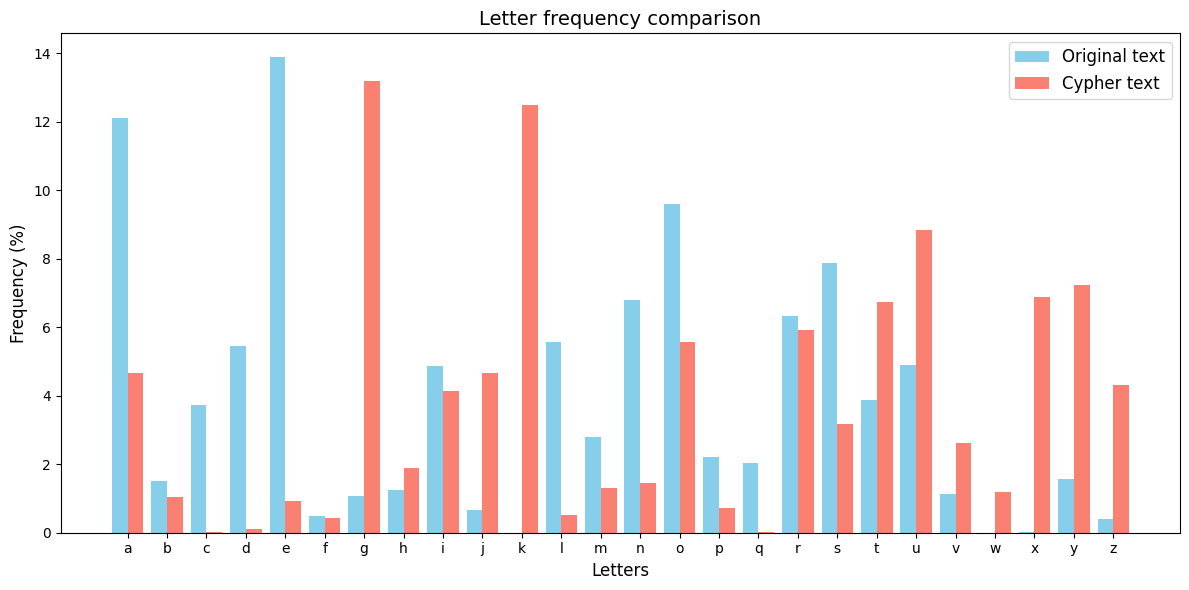

In [18]:
# Prepare the data to be plotted
letters = list(book_frequencies.keys())
book_values = list(book_frequencies.values())
encrypted_values = list(encrypted_frequencies.values())

# Position of the bars
x = np.arange(len(letters))
width = 0.4  # Ancho de las barras

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Add the bars
ax.bar(x - width/2, book_values, width, label='Original text', color='skyblue')
ax.bar(x + width/2, encrypted_values, width, label='Cypher text', color='salmon')

# Text labels, title and legend
ax.set_xlabel('Letters', fontsize=12)
ax.set_ylabel('Frequency (%)', fontsize=12)
ax.set_title('Letter frequency comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(letters, fontsize=10)
ax.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


Subsequently, it will be necessary to map each list. Basically, we will sort both frequencies lists and after, letters will be matched according its relative frequency.

In [19]:
# Sort the frequencies in descending order to compare them
sort_book = sorted(book_frequencies, key=book_frequencies.get, reverse=True)
sort_encrypted = sorted(encrypted_frequencies, key=encrypted_frequencies.get, reverse=True)

# Create a mapping between the encrypted text and the book text
# zip(): Create a tuple with the elements of both lists
mapping = {}
for encrypted_letter, book_letter in zip(sort_encrypted, sort_book):
    mapping[encrypted_letter[0]] = book_letter[0]
print("Substitution mapping:", mapping)

Substitution mapping: {'g': 'e', 'k': 'a', 'u': 'o', 'y': 's', 'x': 'n', 't': 'r', 'r': 'l', 'o': 'd', 'j': 'u', 'a': 'i', 'z': 't', 'i': 'c', 's': 'm', 'v': 'p', 'h': 'q', 'n': 'y', 'm': 'b', 'w': 'h', 'b': 'v', 'e': 'g', 'p': 'j', 'l': 'f', 'f': 'z', 'd': 'x', 'c': 'w', 'q': 'k'}


Finally, it will be necessary to develop a function to replace the letters from the encrypted text using the generated mapping.

In [20]:
# Function to decrypt the text using the mapping
def decripting_with_mapping(text, mapping):
    decrypted_message = ""
    for character in text:
        if character.lower() in mapping:
            new_letter = mapping[character.lower()]
            # Maintain the capitalization of the letter
            decrypted_message += new_letter.upper() if character.isupper() else new_letter
        else:
            decrypted_message += character
    return decrypted_message

In the last part of code, we will call the function and show the decrypted text.

In [21]:
# Apply the mapping to decrypt the text
decrypted_text = decripting_with_mapping(encrypted_text, mapping)
print("Decrypted text:\n", decrypted_text)

Decrypted text:
 LDQNO D: AL AJA UAL PNASARTA
EÑO 997 U.C.
MIRUIS SARASCDT
E cono cor los selvejas bndtos ua los etecertas, les llemes hia arvolvíer le eqeuíe cnapdteqer fanozmarta g sa elzeqer yecde ir cdalo sdr lire, dlimdreruo al qoshia cancero. Al tacyo ual asteqlo sa uannimqó cor astnépdto, el dbiel hia le qóvaue ua le dblasde nacdér sehiaeue. Les oscines somqnes hia nouaeqer al morestando eillenor ua riavo g, ires e pda g otnes e ceqello, sa elajenor yecde al piaqlo hia uonmíe ebienueruo le llabeue ual elqe.
    Ocilte pon le somqne ua los fnoruosos ánqolas, ire fdbine conníe pon al qoshia, jeuaerta, tnopazeruo, qisceruo ir nafibdo. Udo ir tnespdé g cegó soqna le yúmaue ydanqe. Nouó yeste ir aspaso metonnel g sa ociltó ellí, sollozeruo. Sólo cieruo les vocas sa epebenor sa etnavdó, pniuartamarta ascoruduo g sdr esomensa uamesdeuo, e volvan le vdste etnás pene cortamplen los nastos ua lo hia yeqíe sduo si yoben ar los últdmos eños. Tamqleruo, vdo cómo al fiabo sa corsimíe lartemar

It is normal that frequency analysis is not completely accurate, especially if the ciphertext is short or has different letter patterns than the book used as a reference (e.g. a different language or varied thematic contexts). This is because frequency analysis bases its results on a statistical approximation. 

Even that, even using a wide book like "El Quijote", as the file to do our cryptanalysis, and then, using another spanish book like "Finis Mundi", as the file to be encrypted, there are many characters that weren't 100% exchanged good.

Knowing that the result wasn't the expected one, I suggest you that you develop an another algorythm in order to get better results and statistics about how letters should be changes. *Tip: This new algorythm it is also related with letters and words, but not like the previous one, where we study statistic of each letter.*

### 3.4: Upgraded Cryptanalysis 

One great update for the cryptanalysis algorythm is to calcultate the average offset on the matches between the letters of the cyphertext and the reference text. In other words, for each matched pair of letters, the difference of indices in the alphabet is calculated. Then, the average of these offset is used as a global value to perfom substitutions.

Firstly, you will need to develop the function that allows you to calculate the the number of times that each letter appears on both texts. It will a copy from the previous function but it will not be necessary to calculate the percentages.

In [22]:
def analyze_counts(text):
    # Remove all characters that are not letters
    letters_only = ""
    for char in text:
        if char in alphabet_minus:
            letters_only += char

    return Counter(letters_only)

book_counts = analyze_counts(book_text)
cypher_counts = analyze_counts(encrypted_text)

print("Book frequencies:", book_counts)
print("Cypher frequencies:", cypher_counts)

Book frequencies: Counter({'e': 220558, 'a': 191459, 'o': 153000, 's': 122467, 'n': 107673, 'r': 100289, 'l': 87965, 'd': 85234, 'u': 78104, 'i': 77274, 't': 60750, 'c': 57878, 'm': 43527, 'p': 33772, 'q': 29837, 'y': 23777, 'b': 23681, 'h': 19540, 'v': 17298, 'g': 16878, 'j': 10409, 'f': 7106, 'z': 6373, 'x': 203})
Cypher frequencies: Counter({'g': 35558, 'k': 33352, 'u': 24116, 'y': 19249, 'x': 18816, 't': 18031, 'r': 15409, 'o': 15138, 'a': 12681, 'j': 12555, 'z': 11544, 'i': 10904, 's': 7329, 'v': 6724, 'h': 5046, 'n': 3800, 'm': 3465, 'w': 3079, 'b': 2724, 'e': 2348, 'p': 1920, 'l': 1351, 'f': 1150, 'd': 327, 'q': 34, 'c': 10})


Later, you need to develop the function that calculate the average offset from all the letters.

In [23]:
def calculate_average_offset(book_counts, cypher_counts):
    offsets = []

    # Compare the frequencies of the most common words
    for (cypher_word, _), (book_word, _) in zip(cypher_counts.most_common(), book_counts.most_common()):

        if cypher_word in alphabet_mayus and book_word in alphabet_mayus:
            alphabet = alphabet_mayus
        else:
            alphabet = alphabet_minus

        cypher_index = alphabet.index(cypher_word)
        book_index = alphabet.index(book_word)
        
        print(f"Offset {cypher_word} -> {book_word}: {cypher_index, book_index} ,{(cypher_index - book_index) % len(alphabet_mayus)}")
        offset = (cypher_index - book_index) % len(alphabet_mayus)
        offsets.append(offset)
        
    # Calculate the average offset
    if offsets:
        average = sum(offsets) / len(offsets)
        return round(average)
    return 0

In the previous method, first we create an array in order to save all the values from the offsets. Then, we start with the loop. 
The first iteration will pick up with the word/letter that it is most common from both arrays. Before deducting the difference between we will need to choose with alphabet we are goinf to choose. 

Afterwards, we will save in two variables the indexes that were found the letters. Besides, we will deduct the difference and we will add it to the offset array.
At the end, we will calculate that average and we will return it.

Finally, we will call the method create previously and show the value of the offset and the decrypted text.

In [24]:
average_offset = calculate_average_offset(book_counts, cypher_counts)
print(f"Calculated average offset: {average_offset}")

decrypted_text = decrypt_message(encrypted_text, average_offset)
print("Decrypted text:\n", decrypted_text)

Offset g -> e: (6, 4) ,2
Offset k -> a: (10, 0) ,10
Offset u -> o: (20, 14) ,6
Offset y -> s: (24, 18) ,6
Offset x -> n: (23, 13) ,10
Offset t -> r: (19, 17) ,2
Offset r -> l: (17, 11) ,6
Offset o -> d: (14, 3) ,11
Offset a -> u: (0, 20) ,6
Offset j -> i: (9, 8) ,1
Offset z -> t: (25, 19) ,6
Offset i -> c: (8, 2) ,6
Offset s -> m: (18, 12) ,6
Offset v -> p: (21, 15) ,6
Offset h -> q: (7, 16) ,17
Offset n -> y: (13, 24) ,15
Offset m -> b: (12, 1) ,11
Offset w -> h: (22, 7) ,15
Offset b -> v: (1, 21) ,6
Offset e -> g: (4, 6) ,24
Offset p -> j: (15, 9) ,6
Offset l -> f: (11, 5) ,6
Offset f -> z: (5, 25) ,6
Offset d -> x: (3, 23) ,6
Calculated average offset: 8
Decrypted text:
 JGZPM G: CJ CHC BCJ NPCQCLRC
YÑM 997 B.A.
KSLBSQ QCLCQAGR
Y ampm aml jmq qyjtyhcq epgrmq bc jmq yryaylrcq, jyq jjykyq osc cltmjtíyl jy yzybíy apcngryzyl dcpmxkclrc w qc yjxyzyl fyagy sl agcjm qgl jsly, gjskglylbm cj zmqosc acpaylm. Cj rcafm bcj cqryzjm qc bcppskzó aml cqrpéngrm, yj gesyj osc jy zótcby bc jy gejcqgy 

It is quite possible that this value isn't the correct because there can some cases that the offset can differ a lot. This huge difference can make that the offset average isn't the correct to decrypt the message.

### 3.5: One letter word cryptanalysis + Advanced cryptanalysis

Another way to make this algorythym better is to count the number of words of one letter that the text has and after, the letter that each one has. 

As you know, it is known that in spanish has several words that have only one letter. With another language, we may not have the same luck and we would need to do it with two words letters. Nevertheless, taking into consideration that characteristic about the language, we will try to take a benefit of it.

First of all, it is needed to develop the function that makes possibles that.

In [25]:
# Function to extract the one letter words from a text
def one_letter_words_func(text):
    words = text.lower().split()
    one_letter_words = []
    for word in words:
        if len(word) == 1 and word in string.ascii_lowercase:
            one_letter_words.append(word)    
    
    count = Counter(one_letter_words)
    return count

This function is a refector from the *calculate_frequencies* developed previously. Firstly, it splits the text in words. Then, it does a loop in order to analyze which words have only letter and belong to the alphabet.
Afterwards, we count them.

Later, we will make the same as we developed before. We call the functions and show both frequencies.

In [26]:
with open("quijote.txt", "r", encoding="utf-8") as file:
    book_text = file.read()

with open("finis-mundi-encrypted.txt", "r", encoding="utf-8") as file:
    encrypted_text = file.read()

book_counts = one_letter_words_func(book_text)
print("Book word count:", book_counts)

cypher_counts = one_letter_words_func(encrypted_text)
print("Encrypted text word count:", cypher_counts)


Book word count: Counter({'y': 16489, 'a': 9746, 'o': 1163, 'e': 72, 'x': 1, 'i': 1})
Encrypted text word count: Counter({'e': 1519, 'g': 1420, 'u': 88, 'k': 19, 'b': 1})


Later, you we use the function that calculate the average offset from the letters we picked.

In [27]:
average_offset = calculate_average_offset(book_counts, cypher_counts)
print(f"Calculated average offset: {average_offset}")

Offset e -> y: (4, 24) ,6
Offset g -> a: (6, 0) ,6
Offset u -> o: (20, 14) ,6
Offset k -> e: (10, 4) ,6
Offset b -> x: (1, 23) ,4
Calculated average offset: 6


Finally, we need to call the function developed to decrypt the text.

In [28]:
decrypted_text = decrypt_message(encrypted_text, average_offset)
print("Decrypted text:\n", decrypted_text)

Decrypted text:
 LIBRO I: EL EJE DEL PRESENTE
AÑO 997 D.C.
MUNDUS SENESCIT
A coro con los salvajes gritos de los atacantes, las llamas que envolvían la abadía crepitaban ferozmente y se alzaban hacia un cielo sin luna, iluminando el bosque cercano. El techo del establo se derrumbó con estrépito, al igual que la bóveda de la iglesia recién saqueada. Las oscuras sombras que rodeaban el monasterio aullaron de nuevo y, unas a pie y otras a caballo, se alejaron hacia el pueblo que dormía aguardando la llegada del alba.
    Oculta por la sombra de los frondosos árboles, una figura corría por el bosque, jadeante, tropezando, buscando un refugio. Dio un traspié y cayó sobre la húmeda hierba. Rodó hasta un espeso matorral y se ocultó allí, sollozando. Sólo cuando las voces se apagaron se atrevió, prudentemente escondido y sin asomarse demasiado, a volver la vista atrás para contemplar los restos de lo que había sido su hogar en los últimos años. Temblando, vio cómo el fuego se consumía lentamen